In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd 
import twitter_learning as twl
import re
import matplotlib.pyplot as plt
import matplotlib
import datetime
matplotlib.rc('font', family='symbola', size=16)

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /home/jonas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jonas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jonas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* download data

In [3]:
%%bash

if [ ! -e 'dataset_sentiment.csv' ]
then
    echo "downloading dataset"
    wget https://raw.githubusercontent.com/SmartDataAnalytics/MA-INF-4222-NLP-Lab/master/2018_SoSe/exercises/dataset_sentiment.csv
else
    echo "dataset already downloaded"
fi

dataset already downloaded


* plot function:

In [4]:
def sentiment_score(s):
    #(pos, neg, neu)^T
    return s[0] - s[1]

def plot_sentiment_space(predicted_sentiment_vectors_list, top_sentiments, top_emojis, style=['bo']):
    # sentiment score axis
    top_X = np.array([sentiment_score(x) for x in top_sentiments])
    

    # neutral axis:
    top_Y = np.array([x[2] for x in top_sentiments])
    

    fig_1, ax_1 = plt.subplots(figsize=(7.5,5))
    plt.title("sentiment-score-plot")
    plt.xlabel("sentiment score")
    plt.ylabel("neutrality")
    plt.xlim([np.min(top_X),np.max(top_X)])
    plt.ylim([np.min(top_Y),np.max(top_Y)])
    for i in range(len(top_X)):
        plt.text(top_X[i], top_Y[i], top_emojis[i])
    for i in range(len(predicted_sentiment_vectors_list)):
        pred_X = np.array([sentiment_score(x) for x in predicted_sentiment_vectors_list[i]])
        pred_Y = np.array([x[2] for x in predicted_sentiment_vectors_list[i]])
        plt.plot(pred_X, pred_Y, style[i], alpha=0.5)
    plt.savefig("val-error_sentiment-plot" + str(datetime.datetime.now()) +  ".png", bbox_inches='tight')

    # sentiment score axis
    top_X = np.array([x[0] for x in top_sentiments])
    

    # neutral axis:
    top_Y = np.array([x[1] for x in top_sentiments])
    

    fig_2, ax_2 = plt.subplots(figsize=(7.5,5))
    plt.title("positive-negative-plot")
    plt.xlabel("positive")
    plt.ylabel("negative")
    plt.xlim([np.min(top_X),np.max(top_X)])
    plt.ylim([np.min(top_Y),np.max(top_Y)])
    for i in range(len(top_X)):
        plt.text(top_X[i], top_Y[i], top_emojis[i])
    for i in range(len(predicted_sentiment_vectors_list)):
        pred_X = np.array([x[0] for x in predicted_sentiment_vectors_list[i]])
        pred_Y = np.array([x[1] for x in predicted_sentiment_vectors_list[i]])
        plt.plot(pred_X, pred_Y, style[i], alpha=0.5)
    plt.savefig("val-error_positive-negative-plot" + str(datetime.datetime.now()) + ".png", bbox_inches='tight')
    plt.show()

* read data:

In [5]:
df = pd.read_csv('dataset_sentiment.csv')
df = df[['text','sentiment']]

In [6]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: x.replace('rt',' '))
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))
df.head()

,text,sentiment
0,nancyleegrahn how did everyone feel about th...,Neutral
1,scottwalker didnt catch the full gopdebate l...,Positive
2,tjmshow no mention of tamir rice and the gop...,Neutral
3,robgeorge that carly fiorina is trending ho...,Positive
4,danscavino gopdebate w realdonaldtrump deliv...,Positive


In [7]:
neg = np.array([df['sentiment'][i] == 'Negative' for i in range(df.shape[0])])
pos = np.array([df['sentiment'][i] == 'Positive' for i in range(df.shape[0])])
neu = np.array([df['sentiment'][i] == 'Neutral' for i in range(df.shape[0])])

text = np.array(df['text'].tolist())

* load pipeline

In [8]:
pipeline_file = "/home/jonas/Dokumente/NLP_DATA/python_dumps/pipelines/tfidf_final/final_epoch01.pipeline"
pm = twl.pipeline_manager.load_from_pipeline_file(pipeline_file)

* plot statements

In [9]:
top_20 = list("😳😋😀😌😏😔😒😎😢😅😁😉🙌🙏😘😊😩😍😭😂")
top_20_sents = twl.emoji2sent(top_20)

pred_pos = pm.predict(text[pos])
pred_neg = pm.predict(text[neg])
pred_neu = pm.predict(text[neu])

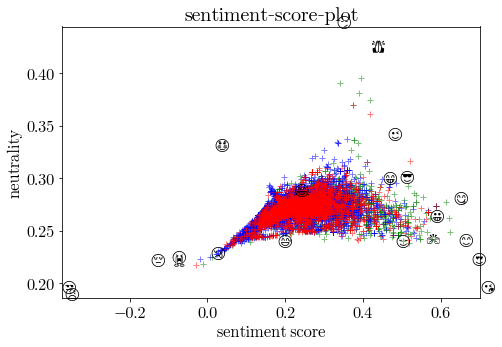

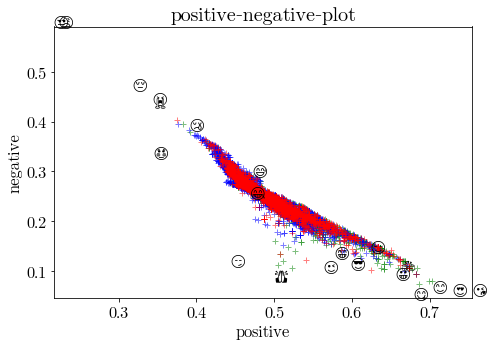

In [10]:
#twl.plot_sentiment_space(predicted_sentiment_vectors=pred_pos, top_sentiments=top_20_sents, top_emojis=top_20, style='go')
#twl.plot_sentiment_space(predicted_sentiment_vectors=pred_neg, top_sentiments=top_20_sents, top_emojis=top_20, style='ro')
#twl.plot_sentiment_space(predicted_sentiment_vectors=pred_neu, top_sentiments=top_20_sents, top_emojis=top_20, style='bo')
plot_sentiment_space(predicted_sentiment_vectors_list=[pred_pos,pred_neg,pred_neu], top_sentiments=top_20_sents, top_emojis=top_20, style=['g+','b+','r+'])

## user labeled sentiment dataset

In [11]:
df = pd.read_csv('../sentiment_sentences.csv', delimiter=';')

In [12]:
neg = np.array([df['sent'][i] == 'n' for i in range(df.shape[0])])
pos = np.array([df['sent'][i] == 'p' for i in range(df.shape[0])])

text = np.array(df['text'].tolist())

pred_pos = pm.predict(text[pos])
pred_neg = pm.predict(text[neg])

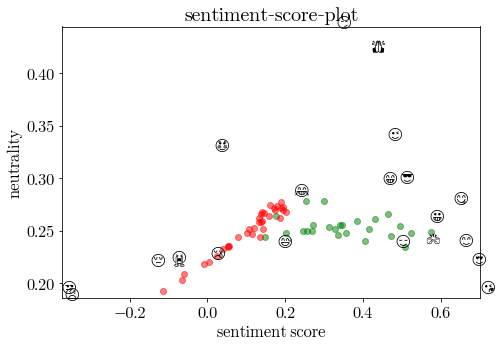

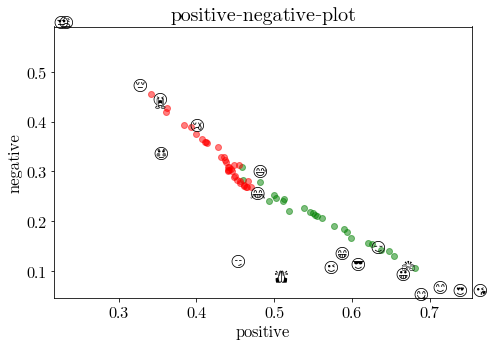

In [13]:
plot_sentiment_space(predicted_sentiment_vectors_list=[pred_pos,pred_neg], top_sentiments=top_20_sents, top_emojis=top_20, style=['go','ro'])

In [14]:
display(df)

,text,sent
0,I am so happy,p
1,i love my life,p
2,i really like this sunshine,p
3,while doing sport i feel free,p
4,i is terrible to learn when the weather is thi...,n
5,i am almost crying when i run out of ice cream,n
6,fuck off,n
7,you are my best friend ever,p
8,i love my mommy,p
9,i prefer oral exams,p
